# clustering des gab selon les retraits hebdomadaires 49-53 en utilisant la methode KNN adaptée au cas de séries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('/Users/hadjer/Desktop/dataset_gab_semaine.csv')
df

,Gab_Code,nbr_semaine,montant_total_retrait
0,800004027,1,1420000
1,800004027,2,7089000
2,800004027,3,5409000
3,800004027,4,6242000
4,800004027,5,8560000
...,...,...,...
4288,800235027,49,11297000
4289,800235027,50,7880000
4290,800235027,51,10949000
4291,800235027,52,14000000


In [7]:
# Convertir la colonne 'Gab_Code' en type string
df['Gab_Code'] = df['Gab_Code'].astype(str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gab_Code               4293 non-null   object
 1   nbr_semaine            4293 non-null   int64 
 2   montant_total_retrait  4293 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 100.7+ KB


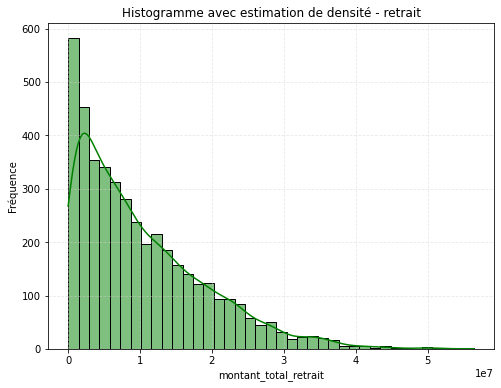

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = 'pastel'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='montant_total_retrait', kde=True,  palette =palette, color='green')
plt.title('Histogramme avec estimation de densité - retrait')
plt.xlabel('montant_total_retrait')
plt.ylabel('Fréquence')
# Modifier la couleur de la grille
plt.grid(True, linestyle='--', alpha=0.5, color='lightgrey')
plt.show()

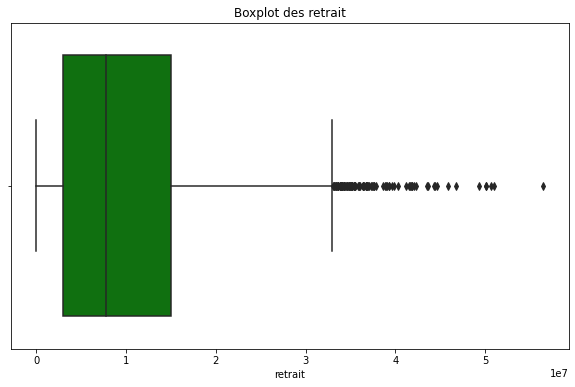

In [9]:
# Visualiser les outliers en utilisant un boxplot 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='montant_total_retrait',color='green')
plt.xlabel('retrait')
plt.title("Boxplot des retrait")
plt.show()

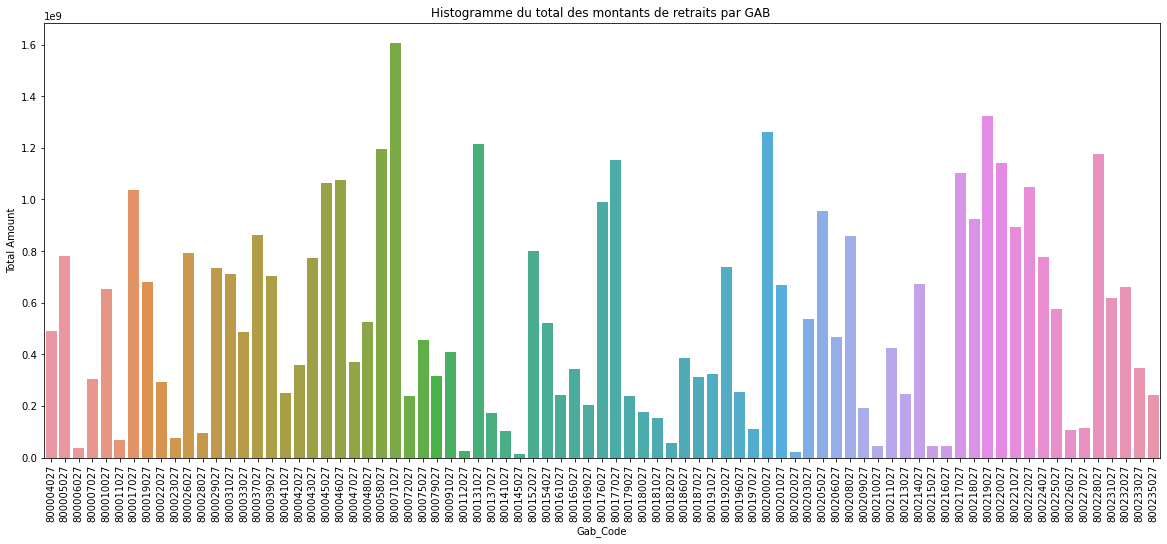

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Regrouper les montants par GAB et Cluster
gab_amounts = df.groupby(['Gab_Code'])['montant_total_retrait'].sum().reset_index()

plt.figure(figsize=(20, 8))

# Utiliser seaborn pour tracer le graphique à barres coloré par cluster
sns.barplot(data=gab_amounts, x='Gab_Code', y='montant_total_retrait', dodge=False)

plt.title('Histogramme du total des montants de retraits par GAB ')
plt.xlabel('Gab_Code')
plt.ylabel('Total Amount')
plt.xticks(rotation=90)
plt.show()

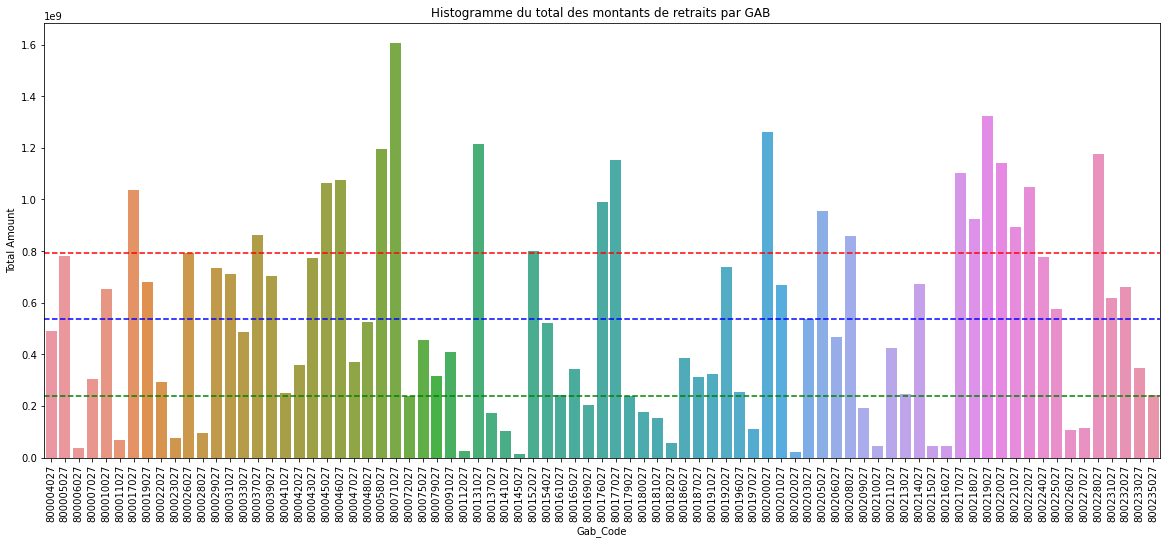

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Regrouper les montants par GAB et Cluster
gab_amounts = df.groupby(['Gab_Code'])['montant_total_retrait'].sum().reset_index()
# Calculer la moyenne, le 25e et le 75e percentiles
mean_amount = gab_amounts['montant_total_retrait'].mean()
percentile_25 = gab_amounts['montant_total_retrait'].quantile(0.25)
percentile_75 = gab_amounts['montant_total_retrait'].quantile(0.75)

plt.figure(figsize=(20, 8))

# Utiliser seaborn pour tracer le graphique à barres coloré par cluster
sns.barplot(data=gab_amounts, x='Gab_Code', y='montant_total_retrait', dodge=False)
# Ajouter les lignes pour la moyenne, le 25e et le 75e percentiles
plt.axhline(mean_amount, color='blue', linestyle='--', label=f'Moyenne: {mean_amount:,.0f}')
plt.axhline(percentile_25, color='green', linestyle='--', label=f'25e percentile: {percentile_25:,.0f}')
plt.axhline(percentile_75, color='red', linestyle='--', label=f'75e percentile: {percentile_75:,.0f}')
plt.title('Histogramme du total des montants de retraits par GAB ')
plt.xlabel('Gab_Code')
plt.ylabel('Total Amount')
plt.xticks(rotation=90)
plt.show()

In [10]:
# Liste de gab codes uniques
gab_codes = df['Gab_Code'].unique().tolist()
print(gab_codes)


['800004027', '800005027', '800006027', '800007027', '800010027', '800011027', '800017027', '800019027', '800022027', '800023027', '800026027', '800028027', '800029027', '800031027', '800033027', '800037027', '800039027', '800041027', '800042027', '800043027', '800045027', '800046027', '800047027', '800048027', '800058027', '800071027', '800072027', '800075027', '800079027', '800091027', '800112027', '800131027', '800137027', '800141027', '800145027', '800152027', '800154027', '800161027', '800165027', '800169027', '800176027', '800177027', '800179027', '800180027', '800181027', '800182027', '800186027', '800187027', '800191027', '800192027', '800196027', '800197027', '800200027', '800201027', '800202027', '800203027', '800205027', '800206027', '800208027', '800209027', '800210027', '800211027', '800213027', '800214027', '800215027', '800216027', '800217027', '800218027', '800219027', '800220027', '800221027', '800222027', '800224027', '800225027', '800226027', '800227027', '800228027'

## creation du dataset des gab etiquétés (utilisé pour entrainer le modele de classification)

In [11]:
import pandas as pd

gab_code_classe_mapping = {
    '800071027': 'tres_elevé',
    '800219027': 'tres_elevé',
    '800200027': 'tres_elevé',
    '800131027': 'tres_elevé',
    '800228027': 'tres_elevé',
    '800029027': 'elevé',
    '800031027': 'elevé',
    '800019027': 'elevé',
    '800043027': 'elevé',
    '800039027': 'elevé',
    '800004027': 'moyen',
    '800033027': 'moyen',
    '800048027': 'moyen',
    '800203027': 'moyen',
    '800206027': 'moyen',
    '800179027' : 'faible',
    '800161027' : 'faible',
    '800213027' : 'faible',
    '800235027' : 'faible',
    '800169027' : 'faible',
    '800006027' : 'tres_faible',
    '800202027' : 'tres_faible',
    '800210027' : 'tres_faible',
    '800215027' : 'tres_faible',
    '800011027' : 'tres_faible',
}

# Extraire les gab codes uniques de votre DataFrame
gab_codes_uniques = df['Gab_Code'].unique()

# Spécifier les indices des gab codes à sélectionner
indices_a_selectionner = [25,68,52,31,76,12,13,7,19,16,0,14,23,55,57,42,37,62,80,39,2,54,60,64,5] 

# Sélectionner les gab codes en fonction des indices spécifiés
gab_codes_a_selectionner = gab_codes_uniques[indices_a_selectionner]

# Sélection des lignes correspondant aux gab codes à partir de votre DataFrame original
nouveau_df = df[df['Gab_Code'].isin(gab_codes_a_selectionner)].copy()

# Attribution des étiquettes (classes) en fonction des gab codes
nouveau_df['classe'] = nouveau_df['Gab_Code'].map(gab_code_classe_mapping)
nouveau_df


,Gab_Code,nbr_semaine,montant_total_retrait,classe
0,800004027,1,1420000,moyen
1,800004027,2,7089000,moyen
2,800004027,3,5409000,moyen
3,800004027,4,6242000,moyen
4,800004027,5,8560000,moyen
...,...,...,...,...
4288,800235027,49,11297000,faible
4289,800235027,50,7880000,faible
4290,800235027,51,10949000,faible
4291,800235027,52,14000000,faible


In [12]:
nouveau_df.classe.unique()

array(['moyen', 'tres_faible', 'elevé', 'tres_elevé', 'faible'],
      dtype=object)

### les gab restants sans etiquettes :

In [13]:
# Liste des gab codes utilisés pour l'entraînement
gab_codes_utilises = nouveau_df['Gab_Code'].unique()

# Gab codes restants
gab_codes_restants = df[~df['Gab_Code'].isin(gab_codes_utilises)]['Gab_Code'].unique()

# Créer une nouvelle DataFrame pour les gab codes restants
gab_codes_restants_df = pd.DataFrame({'Gab_Code': gab_codes_restants})

# Afficher la nouvelle DataFrame
print(gab_codes_restants_df)


     Gab_Code
0   800005027
1   800007027
2   800010027
3   800017027
4   800022027
5   800023027
6   800026027
7   800028027
8   800037027
9   800041027
10  800042027
11  800045027
12  800046027
13  800047027
14  800058027
15  800072027
16  800075027
17  800079027
18  800091027
19  800112027
20  800137027
21  800141027
22  800145027
23  800152027
24  800154027
25  800165027
26  800176027
27  800177027
28  800180027
29  800181027
30  800182027
31  800186027
32  800187027
33  800191027
34  800192027
35  800196027
36  800197027
37  800201027
38  800205027
39  800208027
40  800209027
41  800211027
42  800214027
43  800216027
44  800217027
45  800218027
46  800220027
47  800221027
48  800222027
49  800224027
50  800225027
51  800226027
52  800227027
53  800231027
54  800232027
55  800233027


## le dataframe contenant les series de gab sans etiquettes (les gab a prédire):

In [14]:
# Liste des gab codes utilisés pour l'entraînement
gab_codes_utilises = nouveau_df['Gab_Code'].unique()

# Gab codes restants
gab_codes_restants = df[~df['Gab_Code'].isin(gab_codes_utilises)]

# Créer une nouvelle DataFrame pour les gab codes restants avec les retraits associés
gab_codes_restants_df = gab_codes_restants[['Gab_Code','nbr_semaine', 'montant_total_retrait']]

gab_codes_restants_df


,Gab_Code,nbr_semaine,montant_total_retrait
53,800005027,1,7241000
54,800005027,2,10338000
55,800005027,3,15256000
56,800005027,4,15692000
57,800005027,5,14172000
...,...,...,...
4235,800233027,49,11833000
4236,800233027,50,6252000
4237,800233027,51,6367000
4238,800233027,52,8817000


## création du modele KNN pour faire la classification

#### etape 1):normalisation des donnees 
j'ai utilisé la methode 'robustscaler' car elle est appropriée pour les distributions asymetriques et moins sensible aux valeurs aberrantes que la normalisation standard. elle utilise la mediane et l'ecart interquantile.
 

In [15]:
from sklearn.preprocessing import RobustScaler

# Sélectionner la colonne à normaliser (montant_total_retrait)
montant_retrait = nouveau_df[['montant_total_retrait']]

# Initialiser RobustScaler
scaler = RobustScaler()

# Normaliser la colonne montant_total_retrait
montant_retrait_normalized = scaler.fit_transform(montant_retrait)

# Créer une nouvelle colonne pour les valeurs normalisées
nouveau_df['montant_total_retrait_normalized'] = montant_retrait_normalized
nouveau_df




,Gab_Code,nbr_semaine,montant_total_retrait,classe,montant_total_retrait_normalized
0,800004027,1,1420000,moyen,-0.530928
1,800004027,2,7089000,moyen,-0.081364
2,800004027,3,5409000,moyen,-0.214592
3,800004027,4,6242000,moyen,-0.148533
4,800004027,5,8560000,moyen,0.035289
...,...,...,...,...,...
4288,800235027,49,11297000,faible,0.252339
4289,800235027,50,7880000,faible,-0.018636
4290,800235027,51,10949000,faible,0.224742
4291,800235027,52,14000000,faible,0.466693


#### diviser lensemble des gabs en ensemble d'entrainement (80%) et ensemble de test (20%)

In [16]:
from sklearn.model_selection import train_test_split

# Obtenir les gab codes uniques
gab_codes_uniques = nouveau_df['Gab_Code'].unique()

# Diviser les gab codes en ensembles d'entraînement et de test
gab_codes_train, gab_codes_test = train_test_split(gab_codes_uniques, test_size=0.2, random_state=42)

# Sélectionner les séries temporelles correspondant aux gab codes d'entraînement et de test
train_df = nouveau_df[nouveau_df['Gab_Code'].isin(gab_codes_train)]
test_df = nouveau_df[nouveau_df['Gab_Code'].isin(gab_codes_test)]


In [17]:
train_df['Gab_Code'].unique()

array(['800006027', '800011027', '800019027', '800029027', '800031027',
       '800033027', '800039027', '800048027', '800071027', '800161027',
       '800169027', '800179027', '800200027', '800203027', '800206027',
       '800210027', '800213027', '800215027', '800219027', '800235027'],
      dtype=object)

In [18]:
test_df['Gab_Code'].unique()

array(['800004027', '800043027', '800131027', '800202027', '800228027'],
      dtype=object)

In [19]:
# Créer des tableaux 2D pour X_train et X_test
X_train = np.array([train_df[train_df['Gab_Code'] == gab]['montant_total_retrait_normalized'].values for gab in gab_codes_train])
X_test = np.array([test_df[test_df['Gab_Code'] == gab]['montant_total_retrait_normalized'].values for gab in gab_codes_test])

# Définir y_train et y_test
y_train = np.array([train_df[train_df['Gab_Code'] == gab]['classe'].values[0] for gab in gab_codes_train])
y_test = np.array([test_df[test_df['Gab_Code'] == gab]['classe'].values[0] for gab in gab_codes_test])

# Afficher les dimensions pour vérification
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (20, 53)
y_train shape: (20,)
X_test shape: (5, 53)
y_test shape: (5,)


In [20]:
X_train

array([[-0.1998414 , -0.00523394, -0.09888977, ...,  0.11823949,
         0.20555115, -0.59896907],
       [-0.54171293, -0.46391753, -0.47375099, ..., -0.25606661,
        -0.22355274, -0.54369548],
       [-0.59881047, -0.5480571 , -0.60872324, ..., -0.63846154,
        -0.629659  , -0.63941316],
       ...,
       [-0.64353688, -0.64353688, -0.50697859, ..., -0.28651864,
        -0.04226804, -0.50896114],
       [-0.63441713, -0.62648692, -0.63116574, ..., -0.56772403,
        -0.59389374, -0.62474227],
       [-0.30134814,  0.10531324,  0.03148295, ...,  0.21538462,
         0.62902458, -0.48691515]])

In [21]:
y_train

array(['moyen', 'faible', 'tres_faible', 'tres_elevé', 'elevé',
       'tres_faible', 'faible', 'tres_elevé', 'elevé', 'elevé', 'faible',
       'moyen', 'tres_faible', 'moyen', 'faible', 'elevé', 'tres_elevé',
       'faible', 'tres_faible', 'moyen'], dtype='<U11')

In [22]:
y_test

array(['elevé', 'tres_faible', 'moyen', 'tres_elevé', 'tres_elevé'],
      dtype='<U11')

### choisir le nombre optimal de voisins K en utilisant la methode de validation croisée

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Définir la plage de valeurs de k à tester
k_range = range(1, 12) 
k_scores = []

# Initialiser la validation croisée stratifiée
stratified_k_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Tester chaque valeur de k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Utiliser cross_val_score pour évaluer les performances du modèle avec la validation croisée
    scores = cross_val_score(knn, X_train, y_train, cv=stratified_k_fold, scoring='accuracy')
    
    # Calculer la moyenne des scores et l'ajouter à la liste des scores pour chaque k
    k_scores.append(scores.mean())

# Trouver la valeur de k qui donne la meilleure performance
best_k = k_range[np.argmax(k_scores)]
print(f"Meilleur k: {best_k} avec une précision de: {max(k_scores)}")

Meilleur k: 1 avec une précision de: 0.9523809523809524


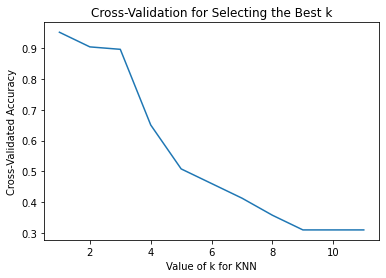

In [24]:

plt.plot(k_range, k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validation for Selecting the Best k')
plt.show()

### entrainer le modele:

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Entraîner le modèle KNN avec le meilleur k trouvé
best_k = 1
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Faire des prédictions sur les données dentrainement et de test
y_train_pred = knn.predict(X_train)
y_pred = knn.predict(X_test)

# Évaluer les performances du modèle
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Train Set Accuracy: {accuracy_train}")
print(f"Test Set Accuracy: {accuracy_test}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)


Train Set Accuracy: 1.0
Test Set Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

       elevé       1.00      1.00      1.00         1
       moyen       1.00      1.00      1.00         1
  tres_elevé       1.00      1.00      1.00         2
 tres_faible       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Confusion Matrix:
[[1 0 0 0]
 [0 1 0 0]
 [0 0 2 0]
 [0 0 0 1]]


### predire les gab restants

In [27]:
from sklearn.preprocessing import RobustScaler

# Sélectionner la caractéristique à normaliser (la série temporelle de montant_retrait)
feature = gab_codes_restants_df[['montant_total_retrait']]

# Initialiser RobustScaler
scaler = RobustScaler()

# Normaliser la caractéristique
feature_normalized = scaler.fit_transform(feature)

# Créer une nouvelle colonne pour les valeurs normalisées du montant_retrait
gab_codes_restants_df['montant_retrait_normalized'] = feature_normalized

# Afficher le DataFrame résultant
gab_codes_restants_df


,Gab_Code,nbr_semaine,montant_total_retrait,montant_retrait_normalized
53,800005027,1,7241000,-0.029110
54,800005027,2,10338000,0.234112
55,800005027,3,15256000,0.652105
56,800005027,4,15692000,0.689161
57,800005027,5,14172000,0.559973
...,...,...,...,...
4235,800233027,49,11833000,0.361175
4236,800233027,50,6252000,-0.113167
4237,800233027,51,6367000,-0.103393
4238,800233027,52,8817000,0.104838


In [28]:
X_pred = np.array([gab_codes_restants_df[gab_codes_restants_df['Gab_Code'] == gab]['montant_retrait_normalized'].values for gab in gab_codes_restants_df['Gab_Code']])

In [29]:
X_pred

array([[-0.02910992,  0.23411172,  0.65210463, ...,  0.30754521,
         0.298621  , -0.36466014],
       [-0.02910992,  0.23411172,  0.65210463, ...,  0.30754521,
         0.298621  , -0.36466014],
       [-0.02910992,  0.23411172,  0.65210463, ...,  0.30754521,
         0.298621  , -0.36466014],
       ...,
       [-0.32496866,  0.61487793, -0.20002975, ..., -0.10339332,
         0.1048382 , -0.60042921],
       [-0.32496866,  0.61487793, -0.20002975, ..., -0.10339332,
         0.1048382 , -0.60042921],
       [-0.32496866,  0.61487793, -0.20002975, ..., -0.10339332,
         0.1048382 , -0.60042921]])

In [30]:
# Faire des prédictions
y_pred = knn.predict(X_pred)

In [31]:
# Ajouter les prédictions au DataFrame
gab_codes_restants_df['classe'] = y_pred

In [32]:
gab_codes_restants_df

,Gab_Code,nbr_semaine,montant_total_retrait,montant_retrait_normalized,classe
53,800005027,1,7241000,-0.029110,elevé
54,800005027,2,10338000,0.234112,elevé
55,800005027,3,15256000,0.652105,elevé
56,800005027,4,15692000,0.689161,elevé
57,800005027,5,14172000,0.559973,elevé
...,...,...,...,...,...
4235,800233027,49,11833000,0.361175,faible
4236,800233027,50,6252000,-0.113167,faible
4237,800233027,51,6367000,-0.103393,faible
4238,800233027,52,8817000,0.104838,faible


In [35]:
# Concaténer les deux DataFrames
final_df = pd.concat([nouveau_df, gab_codes_restants_df], ignore_index=True)
final_df

,Gab_Code,nbr_semaine,montant_total_retrait,classe,montant_total_retrait_normalized,montant_retrait_normalized
0,800004027,1,1420000,moyen,-0.530928,NaN
1,800004027,2,7089000,moyen,-0.081364,NaN
2,800004027,3,5409000,moyen,-0.214592,NaN
3,800004027,4,6242000,moyen,-0.148533,NaN
4,800004027,5,8560000,moyen,0.035289,NaN
...,...,...,...,...,...,...
4288,800233027,49,11833000,faible,NaN,0.361175
4289,800233027,50,6252000,faible,NaN,-0.113167
4290,800233027,51,6367000,faible,NaN,-0.103393
4291,800233027,52,8817000,faible,NaN,0.104838


## visualisation de la classification

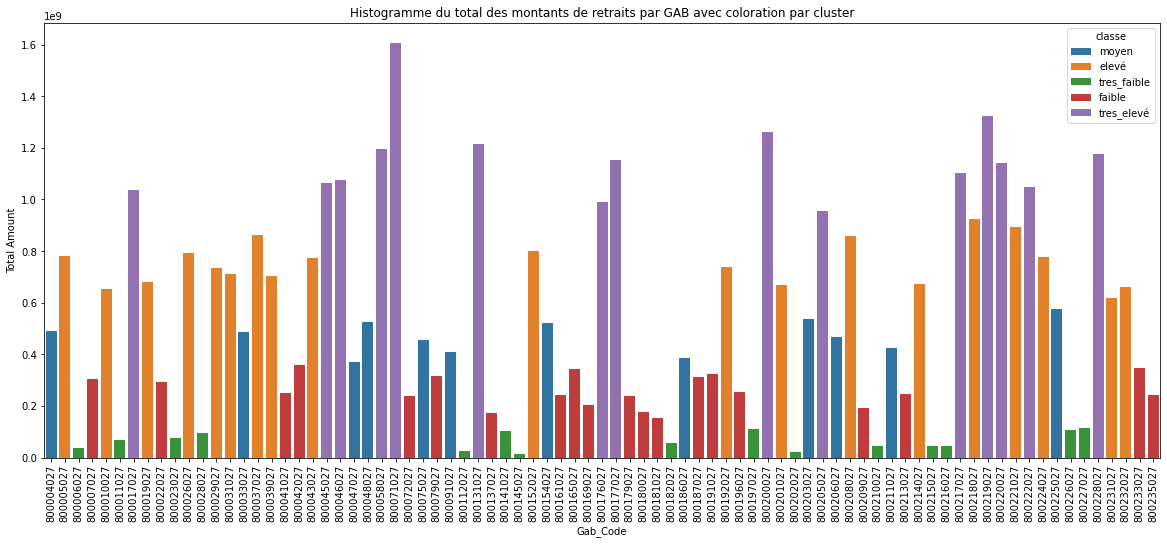

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Regrouper les montants par GAB et Cluster
gab_cluster_amounts = final_df.groupby(['Gab_Code', 'classe'])['montant_total_retrait'].sum().reset_index()

plt.figure(figsize=(20, 8))

# Utiliser seaborn pour tracer le graphique à barres coloré par cluster
sns.barplot(data=gab_cluster_amounts, x='Gab_Code', y='montant_total_retrait', hue='classe', dodge=False)

plt.title('Histogramme du total des montants de retraits par GAB avec coloration par cluster')
plt.xlabel('Gab_Code')
plt.ylabel('Total Amount')
plt.xticks(rotation=90)
plt.legend(title='classe')
plt.show()

## evaluer le modele 

In [43]:
from sklearn.preprocessing import RobustScaler

# Sélectionner la colonne à normaliser (montant_total_retrait)
montant = final_df[['montant_total_retrait']]

# Initialiser RobustScaler
scaler = RobustScaler()

# Normaliser la colonne montant_total_retrait
montant_norm = scaler.fit_transform(montant)

# Créer une nouvelle colonne pour les valeurs normalisées
final_df['montant_norma'] = montant_norm
final_df

,Gab_Code,nbr_semaine,montant_total_retrait,classe,montant_total_retrait_normalized,montant_retrait_normalized,montant_norma
0,800004027,1,1420000,moyen,-0.530928,NaN,-0.531334
1,800004027,2,7089000,moyen,-0.081364,NaN,-0.057654
2,800004027,3,5409000,moyen,-0.214592,NaN,-0.198028
3,800004027,4,6242000,moyen,-0.148533,NaN,-0.128426
4,800004027,5,8560000,moyen,0.035289,NaN,0.065257
...,...,...,...,...,...,...,...
4288,800233027,49,11833000,faible,NaN,0.361175,0.338737
4289,800233027,50,6252000,faible,NaN,-0.113167,-0.127590
4290,800233027,51,6367000,faible,NaN,-0.103393,-0.117981
4291,800233027,52,8817000,faible,NaN,0.104838,0.086731


In [48]:
gab_codee=df['Gab_Code'].unique()
gab_codee

array(['800004027', '800005027', '800006027', '800007027', '800010027',
       '800011027', '800017027', '800019027', '800022027', '800023027',
       '800026027', '800028027', '800029027', '800031027', '800033027',
       '800037027', '800039027', '800041027', '800042027', '800043027',
       '800045027', '800046027', '800047027', '800048027', '800058027',
       '800071027', '800072027', '800075027', '800079027', '800091027',
       '800112027', '800131027', '800137027', '800141027', '800145027',
       '800152027', '800154027', '800161027', '800165027', '800169027',
       '800176027', '800177027', '800179027', '800180027', '800181027',
       '800182027', '800186027', '800187027', '800191027', '800192027',
       '800196027', '800197027', '800200027', '800201027', '800202027',
       '800203027', '800205027', '800206027', '800208027', '800209027',
       '800210027', '800211027', '800213027', '800214027', '800215027',
       '800216027', '800217027', '800218027', '800219027', '8002

In [49]:
X_final = np.array([final_df[final_df['Gab_Code'] == gab]['montant_norma'].values for gab in gab_codee])

y_final = np.array([final_df[final_df['Gab_Code'] == gab]['classe'].values[0] for gab in gab_codee])


## 'Accuracy'

In [53]:
y_train_final = knn.predict(X_final)

# Évaluer les performances du modèle
accuracy_fin = accuracy_score(y_final, y_train_final)
print(f"Accuracy: {accuracy_fin}")

Accuracy: 0.9753086419753086


## afficher les gabs associés a chaque classe 

In [56]:
import pandas as pd

# Grouper les gab_Codes par classe et obtenir les gab_codes uniques pour chaque classe
gab_unique_par_classe = final_df.groupby('classe')['Gab_Code'].unique()

# Afficher les gab_Codes uniques associés à chaque classe
for classe, gab_codes in gab_unique_par_classe.items():
    print(f"Classe : {classe}, Gab_Codes uniques : {gab_codes}")


Classe : elevé, Gab_Codes uniques : ['800019027' '800029027' '800031027' '800039027' '800043027' '800005027'
 '800010027' '800026027' '800037027' '800152027' '800192027' '800201027'
 '800208027' '800214027' '800218027' '800221027' '800224027' '800231027'
 '800232027']
Classe : faible, Gab_Codes uniques : ['800161027' '800169027' '800179027' '800213027' '800235027' '800007027'
 '800022027' '800041027' '800042027' '800072027' '800079027' '800137027'
 '800165027' '800180027' '800181027' '800187027' '800191027' '800196027'
 '800209027' '800233027']
Classe : moyen, Gab_Codes uniques : ['800004027' '800033027' '800048027' '800203027' '800206027' '800047027'
 '800075027' '800091027' '800154027' '800186027' '800211027' '800225027']
Classe : tres_elevé, Gab_Codes uniques : ['800071027' '800131027' '800200027' '800219027' '800228027' '800017027'
 '800045027' '800046027' '800058027' '800176027' '800177027' '800205027'
 '800217027' '800220027' '800222027']
Classe : tres_faible, Gab_Codes uniques :

## calculer les centres des classes 

In [64]:
# Créez un dictionnaire pour stocker les séries de total_amount par gab_code
gab_code_series = {}
gabcode=[]
# Bouclez sur chaque gab_code unique dans le DataFrame
for gab_code in df['Gab_Code'].unique():
    gabcode.append(gab_code)
    # Sélectionnez les valeurs de total_amount pour le gab_code donné et convertissez-les en liste
    series = df[df['Gab_Code'] == gab_code]['montant_total_retrait'].tolist()
    # Associez la série de total_amount au gab_code dans le dictionnaire
    gab_code_series[gab_code] = series
    
# Convertir le dictionnaire en une liste de séries
data = list(gab_code_series.values())
print(gabcode)

['800004027', '800005027', '800006027', '800007027', '800010027', '800011027', '800017027', '800019027', '800022027', '800023027', '800026027', '800028027', '800029027', '800031027', '800033027', '800037027', '800039027', '800041027', '800042027', '800043027', '800045027', '800046027', '800047027', '800048027', '800058027', '800071027', '800072027', '800075027', '800079027', '800091027', '800112027', '800131027', '800137027', '800141027', '800145027', '800152027', '800154027', '800161027', '800165027', '800169027', '800176027', '800177027', '800179027', '800180027', '800181027', '800182027', '800186027', '800187027', '800191027', '800192027', '800196027', '800197027', '800200027', '800201027', '800202027', '800203027', '800205027', '800206027', '800208027', '800209027', '800210027', '800211027', '800213027', '800214027', '800215027', '800216027', '800217027', '800218027', '800219027', '800220027', '800221027', '800222027', '800224027', '800225027', '800226027', '800227027', '800228027'

# centre de la classe 'tres_faible'

#### creer une liste 'tres_faible' qui contient des listes des series des gabs associées a cette classe:

In [76]:
# Filtrer les séries de gab pour la classe "tres_faible"
series_tres_faible = final_df[final_df['classe'] == 'tres_faible']

# Créer une liste pour stocker les séries de gab pour la classe "tres_faible"
tres_faible = []

# Boucler à travers les gab_codes uniques pour la classe "tres_faible"
for gab_code in series_tres_faible['Gab_Code'].unique():
    # Sélectionner les séries de gab pour ce gab_code
    series_gab = series_tres_faible[series_tres_faible['Gab_Code'] == gab_code]['montant_total_retrait'].tolist()
    tres_faible.append(series_gab)


print(tres_faible)

In [69]:
import numpy as np

def distance(series1, series2):
  # calcule euclidean distance simple entre 2 serie 
  sum_squared_distance = 0
  for i in range(len(series1)):
    sum_squared_distance += (series1[i] - series2[i])**2
  return sum_squared_distance**0.5

def calucle_centre(cluster_list) :
    cout=[]
    for i,centre in enumerate(cluster_list) :
        summ=0
        for j in range(len(cluster_list)) :
            summ+=distance(centre,cluster_list[j])
        cout.append(summ)
    min_indx=np.argmin(cout)
    return cluster_list[min_indx]

In [94]:
#liste contenant la serie du centre de la classe tres_faible:
centre_tres_faible=calucle_centre(tres_faible)
print(centre_tres_faible)

[663000, 913000, 1161000, 1585000, 1713000, 1136000, 1214000, 1493000, 1462000, 1810000, 1393000, 1343000, 1528000, 1324000, 1266000, 1666000, 1595000, 935000, 1468000, 1348000, 400000, 1420000, 1283000, 1158000, 1848000, 1233000, 725000, 1523000, 762000, 1348000, 1682000, 1077000, 1038000, 1005000, 1674000, 872000, 891000, 1197000, 1462000, 1120000, 1843000, 982000, 946000, 1502000, 1675000, 1267000, 1217000, 1594000, 1705000, 1637000, 1438000, 1224000, 270000]


In [95]:
# le gab centre de la classe tres_faible:
centre_gab=0
centre_tres_faible=calucle_centre(tres_faible)
for i,serie in enumerate(data) :
     if centre_tres_faible==serie :
        tres_faible=gabcode[i]
        
tres_faible

# gab_agence : dar el beida

'800011027'

# centre de la classe 'faible'

In [98]:
# Filtrer les séries de gab pour la classe "faible"
series_faible = final_df[final_df['classe'] == 'faible']

# Créer une liste pour stocker les séries de gab pour la classe "faible"
faible = []

# Boucler à travers les gab_codes uniques pour la classe "faible"
for gab_code in series_faible['Gab_Code'].unique():
    # Sélectionner les séries de gab pour ce gab_code
    series_gab = series_faible[series_faible['Gab_Code'] == gab_code]['montant_total_retrait'].tolist()
    faible.append(series_gab)

print(faible)


In [99]:
#liste contenant la serie du centre de la classe faible:
centre_faible=calucle_centre(faible)
print(centre_faible)

[1284000, 2265000, 2141000, 1398000, 2022000, 2870000, 2990000, 3210000, 2947000, 2122000, 3725000, 3616000, 2089000, 1960000, 2540000, 4130000, 2268000, 3860000, 3034000, 3293000, 3460000, 3893000, 3784000, 4133000, 6012000, 4637000, 3400000, 4424000, 6145000, 5491000, 3816000, 4908000, 5422000, 6152000, 4615000, 3989000, 4664000, 4551000, 3574000, 4167000, 5089000, 4743000, 4807000, 4644000, 4669000, 4760000, 4754000, 3555000, 5297000, 5134000, 4886000, 5296000, 1259000]


In [100]:
# le gab centre de la classe faible:
centre_gab=0
centre_faible=calucle_centre(faible)
for i,serie in enumerate(data) :
     if centre_faible==serie :
        centre_faible=gabcode[i]
        
centre_faible

# il se situe a bejaia

'800169027'

# centre de la classe 'moyen'

In [83]:
# Filtrer les séries de gab pour la classe "moyen"
series_moyen = final_df[final_df['classe'] == 'moyen']

# Créer une liste pour stocker les séries de gab pour la classe "moyen"
moyen = []

# Boucler à travers les gab_codes uniques pour la classe "moyen"
for gab_code in series_moyen['Gab_Code'].unique():
    # Sélectionner les séries de gab pour ce gab_code
    series_gab = series_moyen[series_moyen['Gab_Code'] == gab_code]['montant_total_retrait'].tolist()
    moyen.append(series_gab)


print(moyen)

In [84]:
#liste contenant la serie du centre de la classe moyen:
centre_moyen=calucle_centre(moyen)
print(centre_moyen)

[1656000, 5882000, 4678000, 3118000, 3927000, 3951000, 3876000, 4843000, 4309000, 4593000, 6543000, 12264000, 7081000, 8579000, 9211000, 9912000, 4661000, 7168000, 6015000, 7443000, 5125000, 5949000, 8087000, 8823000, 12871000, 8871000, 8443000, 8400000, 8203000, 8019000, 5486000, 9805000, 9379000, 11328000, 6779000, 8957000, 8958000, 7957000, 7949000, 7596000, 7235000, 8840000, 6637000, 6010000, 9268000, 8293000, 8866000, 6919000, 7106000, 10216000, 8706000, 9105000, 2032000]


In [85]:
# le gab centre de la classe moyen:
centre_gab=0
centre_moyen=calucle_centre(moyen)
for i,serie in enumerate(data) :
     if centre_moyen==serie :
        centre_moyen=gabcode[i]
        
centre_moyen

# il se situe a MOSTAGHANEM                          

'800186027'

# centre de la classe elevé

In [87]:
# Filtrer les séries de gab pour la classe "elevé"
series_elevé = final_df[final_df['classe'] == 'elevé']

# Créer une liste pour stocker les séries de gab pour la classe "elevé"
elevé = []

# Boucler à travers les gab_codes uniques pour la classe "elevé"
for gab_code in series_elevé['Gab_Code'].unique():
    # Sélectionner les séries de gab pour ce gab_code
    series_gab = series_elevé[series_elevé['Gab_Code'] == gab_code]['montant_total_retrait'].tolist()
    elevé.append(series_gab)

print(elevé)


In [88]:
#liste contenant la serie du centre de la classe elevé:
centre_elevé=calucle_centre(elevé)
print(centre_elevé)

[3558000, 13336000, 11648000, 12386000, 10884000, 9671000, 11359000, 12388000, 9193000, 14282000, 10848000, 11623000, 7640000, 8115000, 13036000, 15384000, 8247000, 11067000, 9056000, 14337000, 15567000, 15117000, 21020000, 13156000, 27173000, 13583000, 10860000, 11012000, 23751000, 19985000, 12750000, 13991000, 15644000, 23203000, 12819000, 16963000, 14957000, 21235000, 15345000, 10460000, 14502000, 9512000, 7365000, 10897000, 14584000, 12895000, 16982000, 14565000, 13751000, 11402000, 19000000, 15772000, 4793000]


In [89]:
# le gab centre de la classe elevé:
centre_gab=0
centre_elevé=calucle_centre(elevé)
for i,serie in enumerate(data) :
     if centre_elevé==serie :
        centre_elevé=gabcode[i]
        
centre_elevé

# gab_agence : les sources

'800031027'

# centre de la classe 'tres_elevé'

In [91]:
# Filtrer les séries de gab pour la classe "tres_elevé"
series_tres_elevé = final_df[final_df['classe'] == 'tres_elevé']

# Créer une liste pour stocker les séries de gab pour la classe "tres_elevé"
tres_elevé = []

# Boucler à travers les gab_codes uniques pour la classe "tres_elevé"
for gab_code in series_tres_elevé['Gab_Code'].unique():
    # Sélectionner les séries de gab pour ce gab_code
    series_gab = series_tres_elevé[series_tres_elevé['Gab_Code'] == gab_code]['montant_total_retrait'].tolist()
    tres_elevé.append(series_gab)

print(tres_elevé)

In [92]:
#liste contenant la serie du centre de la classe tres_elevé:
centre_tres_elevé=calucle_centre(tres_elevé)
print(centre_tres_elevé)

[6870000, 19778000, 12103000, 16997000, 15969000, 18818000, 18563000, 16467000, 17935000, 21017000, 19299000, 24462000, 15146000, 19060000, 19229000, 24248000, 15262000, 18131000, 18795000, 22000000, 21447000, 14482000, 14149000, 12660000, 26878000, 19859000, 20782000, 19820000, 28196000, 21446000, 22223000, 23660000, 22787000, 22409000, 16677000, 22351000, 25235000, 25433000, 17514000, 17821000, 19583000, 22009000, 21779000, 23838000, 24531000, 19996000, 23051000, 22602000, 20647000, 22008000, 22779000, 23253000, 6537000]


In [93]:
# le gab centre de la classe tres_elevé:
centre_gab=0
centre_tres_elevé=calucle_centre(tres_elevé)
for i,serie in enumerate(data) :
     if centre_tres_elevé==serie :
        centre_tres_elevé=gabcode[i]
        
centre_tres_elevé

# il se situe a draria 

'800222027'